## Homework 1 - Python - Adnan Kivanc Corut

Below script is written for the **Homework Assignment 1** of CSCI 6830 Data Mining. It consists of a class called weather_wrapper and includes functions read, describe and plot.

#### Function definitions:

- `read`: Accepts an input csv file and stores it as a Pandas data frame object.
- `describe`: Takes 3 parameters as strings; start time, end time and a target variable then returns *the minimum, maximum, mean, and 
standard deviation* of the target variable for each date as a new data frame object.
- `plot`: Takes 3 parameters as strings; start date, end date and a target variable, and plots the values within that specified time interval

**Example run:**

weather_wrapper()

weather_wrapper.read("/Users/kivanc/DataMining-ML/Data/weather_data_f2020.csv")

weather_wrapper.describe("2018-06-05-12:59:59", "2018-06-09-12:59:59", "rfd_2m_wm2")

weather_wrapper.plot("2018-06-06-12:59:59", "2018-06-09-12:59:59", "rfd_2m_wm2")


In [61]:
#Importing Libraries
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib
import matplotlib.pyplot as plt

### Defining weather_wrapper Class

In [93]:
class weather_wrapper:
# Declare weather_wrapper class

    def read(input_file):
        # Define a function that reads and stores a csv file
        input_path = Path(input_file)
        df_weather = pd.read_csv(input_path) # Read a csv file and store it as df_weather
    
    def describe(start_time, end_time, target_var):
        # Define a function that calculates the minimum, maximum, mean, and standard deviation of 
        # a given target variable between specified start time and end time and returns them in a new data frame
        target_interval = (df_weather['local_eastern_time'] >= start_time) & (df_weather['local_eastern_time'] <= end_time) # Define the target interval using boolean operations
        out_df = df_weather.loc[target_interval] # Subset the data based on above target_interval
        out_df = out_df.groupby('day')[target_var].agg([pd.np.min, pd.np.max, pd.np.mean, pd.np.std]) # Group the data by "day", calculate the minimum, maximum, mean, and standard deviation and add them into new data frame
        return out_df # Return the ouptut data frame
    
    def plot(start_time, end_time, target_var):
        # Define a function that plots the values of a given variable within a specified time interval
        target_interval = (df_weather['local_eastern_time'] >= start_time) & (df_weather['local_eastern_time'] <= end_time) # Define the target interval using boolean operations
        out_df = df_weather.loc[target_interval] # Subset the data based on above target_interval
        plot_df = out_df[['day', target_var]] # Define a new data frame that includes "day" and the target varible to plot
        plot_df.plot(x="day") # Plot the values of the plof_df
        plt.xticks(rotation=45) # Change x axis label angle

### Example run:

Using `rfd_2m_wm2` as target varaible.

In [103]:
weather_wrapper()

weather_wrapper.read("/Users/kivanc/DataMining-ML/Data/weather_data_f2020.csv")
weather_wrapper.describe("2018-06-06-12:59:59", "2018-06-09-12:59:59", "rfd_2m_wm2")


,amin,amax,mean,std
day,,,,
2018-06-07,0.0,1039.0,213.249177,284.565089
2018-06-08,0.0,1014.0,192.799406,301.068888
2018-06-09,0.0,757.0,118.199844,174.475722


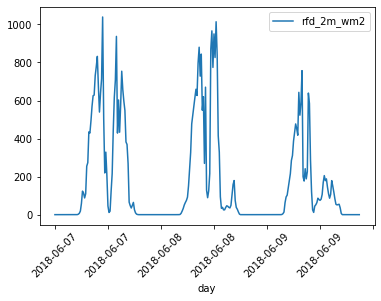

In [104]:
weather_wrapper.plot("2018-06-06-12:59:59", "2018-06-09-12:59:59", "rfd_2m_wm2")